In [1]:
#picking data set
#-shouldnt be a toy/standard dataset
#-should be large enough (+1000)
#-shoulf have enough variety
#https://www.kaggle.com/alxmamaev/flowers-recognition

In [2]:
pip install opendatasets --upgrade

Note: you may need to restart the kernel to use updated packages.


### Downloading Data using 'opendatasets'

In [3]:
import opendatasets as od

In [4]:
dataset_url = 'https://www.kaggle.com/alxmamaev/flowers-recognition'
od.download(dataset_url)

Skipping, found downloaded files in "./flowers-recognition" (use force=True to force download)


### Importing the Dataset to PyTorch

use the 'imagefolder' class from 'torchvision'

In [5]:
data_dir='./flowers-recognition/flowers'

In [6]:
import os

In [7]:
os.listdir(data_dir)

['sunflower', 'tulip', 'daisy', 'dandelion', 'rose']

In [8]:
from torchvision.datasets import ImageFolder

In [9]:
dataset = ImageFolder(data_dir)
len(dataset)

4317

In [10]:
dataset[0]

(<PIL.Image.Image image mode=RGB size=320x263 at 0x7FD5CC4BBE50>, 0)

In [11]:
dataset.classes

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [12]:
#changing to image tensors

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

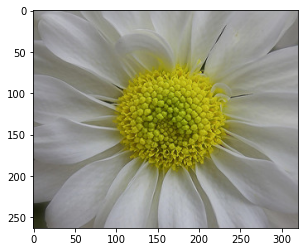

In [14]:
img, label=dataset[0]
plt.imshow(img)

In [15]:
import torchvision.transforms as tt

dataset= ImageFolder(data_dir, tt.Compose([tt.Resize(224),tt.RandomCrop(224), tt.ToTensor()])) #(h,w)

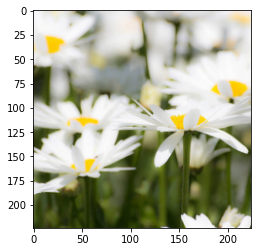

In [16]:
img, label=dataset[100]
plt.imshow(img.permute((1,2,0)))

In [17]:
#splition into validation and train
val_pct=0.1 #10% é para validação
val_size=int(val_pct * len(dataset))
train_size= len(dataset)-val_size

In [18]:
train_size, val_size

(3886, 431)

In [19]:
 #randomsplit
from torch.utils.data import random_split
train_ds , valid_ds= random_split(dataset,[train_size, val_size])
len(train_ds), len(valid_ds)

(3886, 431)

In [20]:
from torch.utils.data.dataloader import DataLoader
batch_size=256
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(valid_ds, batch_size, num_workers=4, pin_memory=True)

In [23]:
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

In [ ]:
show_batch(train_dl)